# Chapter 1 Indifference Curves

Indifference curve consists of portfolios with same expected utility, when plotted on graph with expected return on y-axis and standard deviation of return on x-axis: (σ,μ)-space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
WEALTH_VALUES = [100, 200, 300]
LOTTERY_OUTCOMES = [100, 50]
LOTTERY_PROBABILITIES = [0.5, 0.5]
VARIANCE = 0.04
WEALTH = 100
MU = 0.05  # Mean return
SIGMA = 0.1  # Standard deviation of return
RETURNS = [0.1, 0.05, -0.02, 0.03, 0.07, 0.1, -0.01]
SIGMA_VALUES = np.linspace(0, 0.5, 100)
MU_LEVELS = [0.02, 0.04, 0.06]
RISK_AVERSION = 2
FIGURE_SIZE = (10, 6)

def utility_function(wealth, type='power', gamma=1, b=0.01):
    """Calculate utility based on wealth and utility function type"""
    if type == 'quadratic':
        return wealth - 0.5 * b * wealth**2
    elif type == 'exponential':
        return -np.exp(-b * wealth)
    elif type == 'power':
        return (wealth**(1 - gamma)) / (1 - gamma) if gamma != 1 else np.log(wealth)

def expected_utility(outcomes, probabilities, utility_func):
    """Calculate expected utility for a lottery"""
    utilities = [utility_func(outcome) for outcome in outcomes]
    return np.dot(probabilities, utilities)

def calculate_risk_premium(wealth, variance, utility_func):
    """Calculate risk premium using utility function derivatives"""
    U_prime = (utility_func(wealth + 1e-5) - utility_func(wealth)) / 1e-5
    U_double_prime = (utility_func(wealth + 2e-5) - 2 * utility_func(wealth + 1e-5) + utility_func(wealth)) / (1e-5)**2
    return 0.5 * variance * (-U_double_prime / U_prime)

def expected_utility_normal(wealth, mu, sigma, utility_function):
    """Calculate expected utility under normal returns"""
    U_prime = (utility_function(wealth + 1e-5) - utility_function(wealth)) / 1e-5
    U_double_prime = (utility_function(wealth + 2e-5) - 2 * utility_function(wealth + 1e-5) + utility_function(wealth)) / (1e-5)**2
    return utility_function(mu) + 0.5 * sigma**2 * U_double_prime

def calculate_skewness(returns):
    """Calculate skewness coefficient of returns"""
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    return np.mean(((returns - mean_return) / std_dev)**3)

def utility(mu, sigma, risk_aversion):
    """Calculate utility for mean-variance preferences"""
    return mu - 0.5 * risk_aversion * sigma**2

def plot_indifference_curves():
    """Plot indifference curves for risk-neutral and risk-averse investors"""
    # Risk-neutral investor
    plt.figure(figsize=FIGURE_SIZE)
    for mu in MU_LEVELS:
        plt.plot(SIGMA_VALUES, [mu] * len(SIGMA_VALUES), label=f'Risk-neutral U={mu}')
    plt.xlabel("Standard Deviation (σ)")
    plt.ylabel("Expected Return (μ)")
    plt.title("Indifference Curves for a Risk-Neutral Investor")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Risk-averse investor
    plt.figure(figsize=FIGURE_SIZE)
    for U in MU_LEVELS:
        # Solve for mu: U = mu - 0.5 * risk_aversion * sigma^2 => mu = U + 0.5 * risk_aversion * sigma^2
        mu_values = [U + 0.5 * RISK_AVERSION * sigma**2 for sigma in SIGMA_VALUES]
        plt.plot(SIGMA_VALUES, mu_values, label=f'Risk-averse U={U} (risk aversion={RISK_AVERSION})')
    plt.xlabel("Standard Deviation (σ)")
    plt.ylabel("Expected Return (μ)")
    plt.title("Indifference Curves for a Risk-Averse Investor")
    plt.legend()
    plt.grid(True)
    plt.show()



Utility values for different wealth levels:
Wealth: 100, Quadratic: 50.0, Exponential: -0.36787944117144233, Power: -0.01
Wealth: 200, Quadratic: 0.0, Exponential: -0.1353352832366127, Power: -0.005
Wealth: 300, Quadratic: -150.0, Exponential: -0.049787068367863944, Power: -0.0033333333333333335

Expected Utility for the lottery: -0.015

Risk Premium: 0.0003989864391361496

Expected Utility under Normal Returns: -20.00000000997466

Skewness of returns: -0.19798961331229328


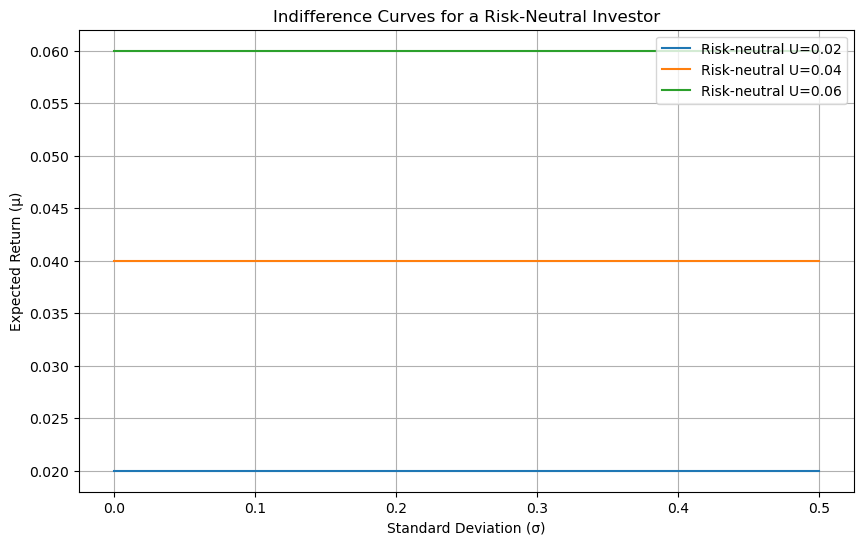

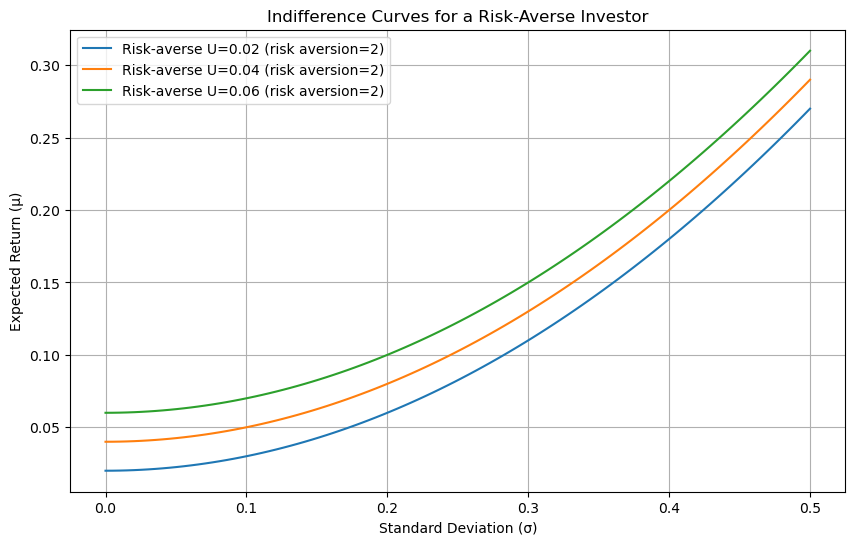

In [2]:

# Example usage for utility function
print("Utility values for different wealth levels:")
for wealth in WEALTH_VALUES:
    print(f"Wealth: {wealth}, Quadratic: {utility_function(wealth, 'quadratic')}, "
            f"Exponential: {utility_function(wealth, 'exponential')}, Power: {utility_function(wealth, 'power', gamma=2)}")

# Example usage for expected utility
print("\nExpected Utility for the lottery:", 
        expected_utility(LOTTERY_OUTCOMES, LOTTERY_PROBABILITIES, lambda w: utility_function(w, 'power', gamma=2)))

# Example usage for risk premium
print("\nRisk Premium:", calculate_risk_premium(WEALTH, VARIANCE, lambda w: utility_function(w, 'power', gamma=2)))

# Example usage for expected utility with normal returns
print("\nExpected Utility under Normal Returns:", 
        expected_utility_normal(WEALTH, MU, SIGMA, lambda w: utility_function(w, 'power', gamma=2)))

# Example usage for skewness calculation
print("\nSkewness of returns:", calculate_skewness(RETURNS))

# Plot indifference curves
plot_indifference_curves()
